# Retornos diários de cada Ação do Ibovespa

<br>

O __retorno__ é o lucro sobre o investimento em um determinado ativo, pode ser calculado de acordo com o __retorno simples__ ou o __retorno logarítmico__. É importante ressaltar que o retorno logarítmico é utilizado para o cálculo de apenas uma ação, e a taxa de retorno simples é mais indicado para o cálculo de mais de um ativo.


In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyfolio as pf
import pandas_datareader.data as web
import matplotlib.gridspec as gridspec
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


### No site da B3 coneguimos baixar um arquivo com a composição dos Indices Bovespa e IBRX50 

In [2]:
ibov = pd.read_csv("IBOVcomposicao.csv", sep=';', encoding='ISO-8859-1', skipfooter=2, engine='python', thousands='.', decimal=',', header=1, index_col=False)
ibov = ibov.rename(columns = {'Código':'Cod','Ação':'Empresa','Qtd. Teórica':'Qtd_teorica','Part. (%)':'Part'})
ibov

,Cod,Empresa,Tipo,Qtde. Teórica,Part
0,RRRP3,3R PETROLEUM,ON NM,200453863,0.374
1,ALPA4,ALPARGATAS,PN N1,202765994,0.214
2,ABEV3,AMBEV S/A,ON,4386652506,3.233
3,AMER3,AMERICANAS,ON NM,596086291,0.495
4,ARZZ3,AREZZO CO,ON NM,60358029,0.284
...,...,...,...,...,...
87,VALE3,VALE,ON NM,4547296398,14.755
88,VIIA3,VIA,ON NM,1576975642,0.250
89,VBBR3,VIBRA,ON EJ NM,1114442976,0.991
90,WEGE3,WEG,ON NM,1481593024,2.190


Vamos extrair as cotações diárias de cada empresa da API do Yahoo Finance, através do Pandas Data Reader. Para facilitar, vamos criar uma função que chama um Data Frame vazio e o preenche com as datas separadas por linha, e cada coluna representando um empresa. 

In [14]:
#A data no APi do Yahoo Finance é no formato mm/dd/aaaa
data_inicial = "01/01/2019"
data_final = "10/01/2022"
cot_ibov = pd.DataFrame()
index = []
for empresa in ibov.Cod: 
        df = web.DataReader(f'{empresa}.SA', data_source='yahoo', start=data_inicial, end=data_final)
        df = df.rename(columns={'Adj Close':f'{empresa}'})
        cot_ibov = pd.concat([cot_ibov, df[f'{empresa}']], axis=1)
        index.append(empresa)


In [15]:
cot_ibov

,RRRP3,ALPA4,ABEV3,AMER3,ARZZ3,ASAI3,AZUL4,B3SA3,BPAN4,BBSE3,...,VIVT3,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIIA3,VBBR3,WEGE3,YDUQ3
2019-01-02,NaN,13.824489,14.685471,41.664917,52.034325,NaN,36.330002,7.967908,1.852455,21.315540,...,31.524807,10.517095,9.261151,24.992414,8.330025,37.180233,4.38,19.462723,8.541142,23.392006
2019-01-03,NaN,13.848186,14.849149,42.091255,52.288345,NaN,36.369999,8.314837,1.796881,21.548868,...,31.141188,10.453078,9.474499,24.527889,8.150794,35.659252,4.31,19.911860,8.735908,23.373178
2019-01-04,NaN,13.745491,15.049197,40.695965,50.171597,NaN,36.250000,8.013785,1.824668,21.338121,...,30.907993,10.505693,9.736331,24.362316,8.628746,37.980740,4.27,19.986719,8.835664,23.730881
2019-01-07,NaN,13.713892,14.985545,38.893715,49.418964,NaN,35.299999,7.970777,1.806144,21.022001,...,30.990744,10.847698,9.526217,23.617231,8.645816,37.776974,4.24,20.099001,8.697906,23.260218
2019-01-08,NaN,13.982481,14.685471,40.695965,50.848949,NaN,34.720001,7.993713,1.806144,20.713408,...,30.313751,11.259857,9.138316,23.226295,8.404257,38.140842,4.04,19.425293,8.626649,23.476725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,34.799999,22.100000,15.270000,17.480000,96.769997,17.740000,15.500000,12.870000,6.750000,28.969999,...,41.110001,11.840000,28.219999,12.110000,7.260000,68.720001,3.21,17.910000,30.570000,13.220000
2022-09-27,34.759998,21.030001,15.440000,16.990000,96.500000,17.780001,15.530000,12.750000,6.860000,28.620001,...,40.459999,11.660000,28.730000,11.980000,7.200000,67.699997,3.08,17.280001,30.049999,12.740000
2022-09-28,35.750000,20.940001,15.720000,17.139999,96.750000,17.950001,15.810000,12.850000,6.830000,27.389999,...,40.750000,11.960000,29.209999,11.850000,7.190000,68.339996,3.14,17.370001,30.320000,14.190000
2022-09-29,35.060001,20.379999,15.610000,15.870000,96.449997,17.950001,14.420000,12.600000,6.800000,26.559999,...,40.369999,11.960000,28.570000,11.600000,7.000000,68.430000,2.94,16.809999,30.139999,13.710000


In [16]:
#Quantidade de valores faltantes no DataFrame

cot_ibov.isnull().sum().sum()

5161

### Agora vamos criar um DataFrame apenas com os retornos Logaritmicos

### $R_{Log}$ =  ln$( P_{t} / P_{ti} )$

 $R_{Log}$:  Retorno logarítmico da ação; 
 <br>
 $R_{t}$:  Preço da ação no dia em que foi vendida (preço final);
 <br>
 $R_{ti}$:  Preço da ação no dia em que foi comprada (preço inicial).

In [17]:
df_log = np.log(cot_ibov/cot_ibov.shift(1))
df_log

,RRRP3,ALPA4,ABEV3,AMER3,ARZZ3,ASAI3,AZUL4,B3SA3,BPAN4,BBSE3,...,VIVT3,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIIA3,VBBR3,WEGE3,YDUQ3
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,0.001713,0.011084,0.010181,0.004870,NaN,0.001100,0.042620,-0.030459,0.010887,...,-0.012243,-0.006105,0.022775,-0.018762,-0.021751,-0.041769,-0.016111,0.022815,0.022547,-0.000805
2019-01-04,NaN,-0.007443,0.013382,-0.033711,-0.041324,NaN,-0.003305,-0.036878,0.015346,-0.009828,...,-0.007516,0.005021,0.027261,-0.006773,0.056984,0.063071,-0.009324,0.003752,0.011354,0.015188
2019-01-07,NaN,-0.002302,-0.004239,-0.045296,-0.015115,NaN,-0.026556,-0.005381,-0.010204,-0.014926,...,0.002674,0.032036,-0.021817,-0.031061,0.001976,-0.005379,-0.007051,0.005602,-0.015714,-0.020033
2019-01-08,NaN,0.019396,-0.020227,0.045296,0.028525,NaN,-0.016567,0.002873,0.000000,-0.014788,...,-0.022087,0.037291,-0.041571,-0.016692,-0.028337,0.009586,-0.048319,-0.034094,-0.008226,0.009265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,-0.070716,-0.011249,-0.006527,-0.002856,-0.030631,-0.002815,-0.040461,-0.039609,-0.037795,-0.021851,...,-0.020227,-0.025022,-0.046729,-0.038077,-0.047083,0.002185,-0.042689,-0.033492,0.001444,-0.037124
2022-09-27,-0.001150,-0.049628,0.011071,-0.028432,-0.002794,0.002252,0.001934,-0.009368,0.016165,-0.012155,...,-0.015938,-0.015319,0.017911,-0.010793,-0.008299,-0.014954,-0.041341,-0.035809,-0.017156,-0.036984
2022-09-28,0.028083,-0.004289,0.017972,0.008790,0.002587,0.009516,0.017869,0.007813,-0.004383,-0.043928,...,0.007142,0.025404,0.016569,-0.010911,-0.001390,0.009409,0.019293,0.005195,0.008945,0.107791
2022-09-29,-0.019489,-0.027107,-0.007022,-0.076984,-0.003106,0.000000,-0.092027,-0.019647,-0.004402,-0.030772,...,-0.009369,0.000000,-0.022154,-0.021323,-0.026781,0.001316,-0.065813,-0.032771,-0.005954,-0.034412


### Agora vamos criar um DataFrame apenas com os retornos Percentuais

### $R$ =  $( P_{t} - P_{ti}) / P_{ti} $

 $R$:  Retorno da ação; 
 <br>
 $R_{t}$:  Preço da ação no dia em que foi vendida (preço final);
 <br>
 $R_{ti}$:  Preço da ação no dia em que foi comprada (preço inicial).

In [18]:
df_perc = cot_ibov.pct_change()
df_perc

,RRRP3,ALPA4,ABEV3,AMER3,ARZZ3,ASAI3,AZUL4,B3SA3,BPAN4,BBSE3,...,VIVT3,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIIA3,VBBR3,WEGE3,YDUQ3
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,0.001714,0.011146,0.010233,0.004882,NaN,0.001101,0.043541,-0.030000,0.010946,...,-0.012169,-0.006087,0.023037,-0.018587,-0.021516,-0.040908,-0.015982,0.023077,0.022803,-0.000805
2019-01-04,NaN,-0.007416,0.013472,-0.033149,-0.040482,NaN,-0.003299,-0.036207,0.015464,-0.009780,...,-0.007488,0.005033,0.027635,-0.006750,0.058639,0.065102,-0.009281,0.003760,0.011419,0.015304
2019-01-07,NaN,-0.002299,-0.004230,-0.044286,-0.015001,NaN,-0.026207,-0.005367,-0.010152,-0.014815,...,0.002677,0.032554,-0.021580,-0.030583,0.001978,-0.005365,-0.007026,0.005618,-0.015591,-0.019833
2019-01-08,NaN,0.019585,-0.020024,0.046338,0.028936,NaN,-0.016431,0.002878,0.000000,-0.014680,...,-0.021845,0.037995,-0.040719,-0.016553,-0.027939,0.009632,-0.047170,-0.033519,-0.008192,0.009308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,-0.068273,-0.011186,-0.006506,-0.002852,-0.030166,-0.002811,-0.039653,-0.038835,-0.037090,-0.021614,...,-0.020024,-0.024712,-0.045654,-0.037361,-0.045992,0.002188,-0.041791,-0.032937,0.001445,-0.036443
2022-09-27,-0.001149,-0.048416,0.011133,-0.028032,-0.002790,0.002255,0.001935,-0.009324,0.016296,-0.012081,...,-0.015811,-0.015203,0.018072,-0.010735,-0.008265,-0.014843,-0.040498,-0.035176,-0.017010,-0.036309
2022-09-28,0.028481,-0.004280,0.018135,0.008829,0.002591,0.009561,0.018030,0.007843,-0.004373,-0.042977,...,0.007168,0.025729,0.016707,-0.010851,-0.001389,0.009453,0.019481,0.005208,0.008985,0.113815
2022-09-29,-0.019301,-0.026743,-0.006997,-0.074096,-0.003101,0.000000,-0.087919,-0.019455,-0.004392,-0.030303,...,-0.009325,0.000000,-0.021910,-0.021097,-0.026426,0.001317,-0.063694,-0.032240,-0.005937,-0.033827


### Vamos criar uma função que apresenta graficamente o histórico de preços, de variação e a distribuição dos retornos de cada empresa. 

In [19]:
def graficos(acao):
    analise = pd.DataFrame()
    analise['simp_ret_cum'] = (df_perc[acao] + 1).cumprod()-1
    analise['log_ret_cum'] = df_log[acao].cumsum()    
    
    plt.figure(figsize=[12,10])
    plt.suptitle(f"Informações da {acao}", fontsize=30)
    G = gridspec.GridSpec(4, 4)

    plt.subplot(G[:2, :-1])
    plt.title("Histórico do Preço")
    cot_ibov[acao].plot(label = 'Retorno Percentual')
    plt.grid()
    plt.tight_layout()
    plt.subplot(G[:2, -1])
    plt.boxplot(cot_ibov[acao], labels=[f'{acao}'])
    plt.tight_layout()
    plt.subplot(G[2:, :-1])
    plt.title("Histórico Retorno")
    analise['simp_ret_cum'].plot(label = 'Retorno Percentual')
    analise['log_ret_cum'].plot(label = 'Retorno Logarítmico')
    plt.legend(loc='upper left', fontsize = 12)
    plt.grid()
    plt.tight_layout()
    axes_2 = plt.subplot(G[-2, -1])
    plt.title("Distribuição de Retorno Logarítmico")
    df_log.B3SA3.plot.hist(bins=100)
    plt.grid()
    plt.tight_layout()
    axes_3 = plt.subplot(G[-1, -1])
    plt.title("Distribuição de Retorno Percentual")
    df_perc.B3SA3.plot.hist(bins=100)
    plt.grid()
    plt.tight_layout()
    plt.show()

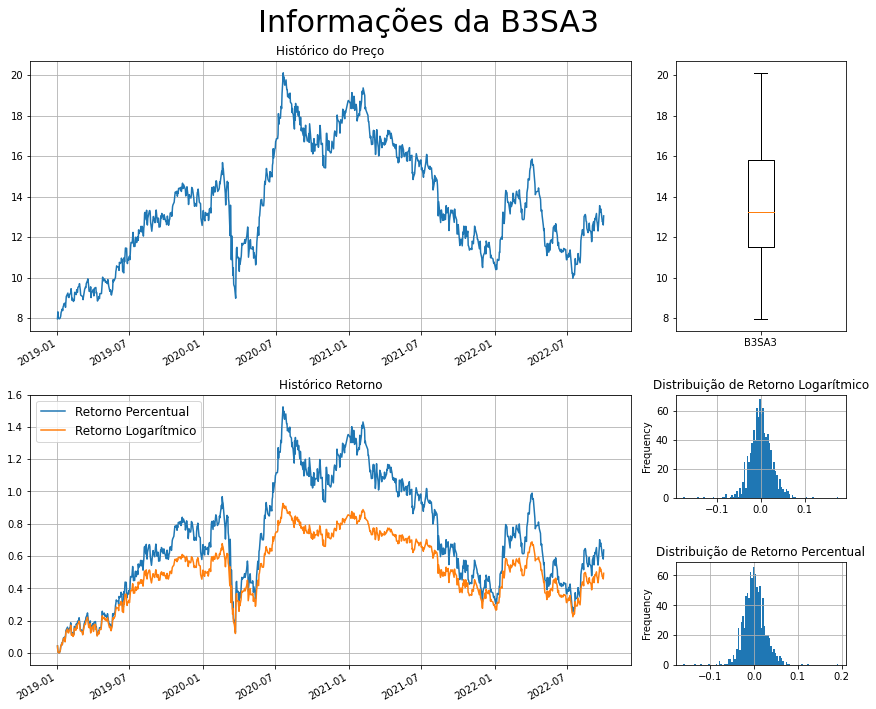

In [20]:
#Nesse Momento só precisamos escolher uma ação e coloca-la como parâmetro no nossa função "grafico"
graficos('B3SA3')

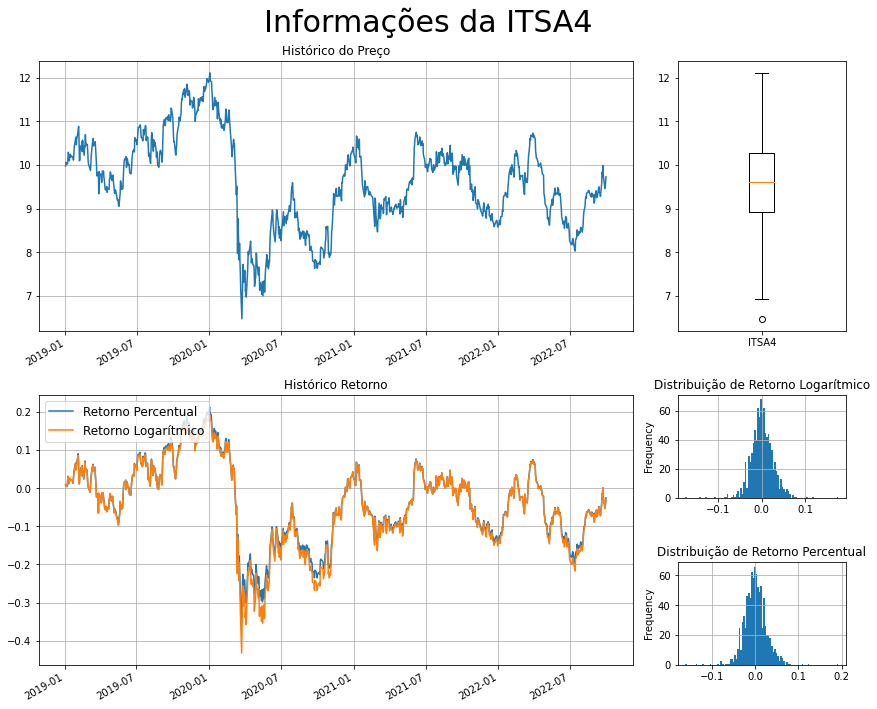

In [21]:
graficos('ITSA4')